## student details:

## Rishi Sankhla - 33724434 (Team leader)
## Antony Sebastian - 33771256

In [106]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [5]:
#extracting daaset
df_test = pd.read_csv('creditdefault_test.csv')
df_train = pd.read_csv('creditdefault_train.csv')

In [53]:
# spliting traing and testing data
train_X = df_train.iloc[:,1:]
train_Y = df_train[['Y']]
test_X = df_test.iloc[:,1:]
test_Y = df_test[['Y']]

In [81]:
#displaying training data
df_train

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


### Building the decision tree model:

In [31]:
#creating an object of decision tree model
dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.71276241 0.72242586 0.719      0.75025008 0.72624208]
and their mean 0.7261360869262319


In [82]:
#making an array of mean score when max_depth parameter changes from 2 to 20
l_score=[]
l_iteration=[]
for i in range(2,20):
    dt = tree.DecisionTreeClassifier(max_depth=i)
    scores=cross_val_score(dt,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

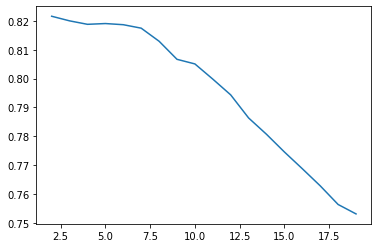

In [91]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [51]:
#finding the best hyper parameter using GridSearchCV
parameters_grid = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}

grid_search = GridSearchCV(dt, parameters_grid, cv=5, n_jobs=4, 
                           scoring="accuracy",return_train_score=True)

grid_search.fit(train_X,train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'criterion': 'gini', 'max_depth': 2}
best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [52]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8216 {'criterion': 'gini', 'max_depth': 2}
0.82 {'criterion': 'gini', 'max_depth': 3}
0.8188 {'criterion': 'gini', 'max_depth': 4}
0.8192 {'criterion': 'gini', 'max_depth': 5}
0.8188 {'criterion': 'gini', 'max_depth': 6}
0.8176 {'criterion': 'gini', 'max_depth': 7}
0.8125333333333333 {'criterion': 'gini', 'max_depth': 8}
0.8072666666666667 {'criterion': 'gini', 'max_depth': 9}
0.8049333333333333 {'criterion': 'gini', 'max_depth': 10}
0.7986 {'criterion': 'gini', 'max_depth': 11}
0.7929333333333334 {'criterion': 'gini', 'max_depth': 12}
0.7862666666666667 {'criterion': 'gini', 'max_depth': 13}
0.7774 {'criterion': 'gini', 'max_depth': 14}
0.7751333333333333 {'criterion': 'gini', 'max_depth': 15}
0.7692666666666667 {'criterion': 'gini', 'max_depth': 16}
0.7635333333333333 {'criterion': 'gini', 'max_depth': 17}
0.7579333333333333 {'criterion': 'gini', 'max_depth': 18}
0.7534 {'criterion': 'gini', 'max_depth': 19}
0.8216 {'criterion': 'entropy', 'max_depth': 2}
0.82 {'criterion': 'entrop

In [61]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.8179333333333333

 precision 0.6922069417157826

 recall (sensitivity) 0.31856540084388185

 f1 0.4363261093911249


array([[11212,   470],
       [ 2261,  1057]], dtype=int64)

### Building the Random Forest Classifier model:

In [32]:
#creating an object of RandomForestClassifier tree model
rf=RandomForestClassifier()
scores=cross_val_score(rf,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

acuracy on the 5 folds [0.79173609 0.80206598 0.806      0.81760587 0.80826942]
and their mean 0.8051354715483857


In [92]:
#making an array of mean score when max_features parameter changes from 2 to 20
l_score=[]
l_iteration=[]
for i in range(2,20):
    rf=RandomForestClassifier(max_features=i)
    scores=cross_val_score(rf,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

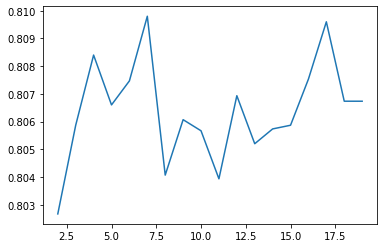

In [93]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [62]:
#finding the best hyper parameter using GridSearchCV
param_grid = [{'max_features': [2, 3, 4, 6]}]

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X,train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best parameter values {'max_features': 6}
best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [63]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8056 {'max_features': 2}
0.8038 {'max_features': 3}
0.8045333333333333 {'max_features': 4}
0.8066666666666666 {'max_features': 6}


In [64]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.8076

 precision 0.6235697940503433

 recall (sensitivity) 0.3285111512959614

 f1 0.4303197789182788


array([[11024,   658],
       [ 2228,  1090]], dtype=int64)

### Building the Bagging Classifier model:

In [36]:
#creating an object of BaggingClassifier tree model
bg=BaggingClassifier(DecisionTreeClassifier())
scores=cross_val_score(bg,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

acuracy on the 5 folds [0.79106964 0.80673109 0.804      0.81427142 0.80793598]
and their mean 0.8048016271112919


In [98]:
#making an array of mean score when max_features parameter changes from 0.1 to 1.0
l_score=[]
l_iteration=[]
for i in np.arange(0.1, 1, 0.1):
    bg=BaggingClassifier(DecisionTreeClassifier(),max_features=i)
    scores=cross_val_score(bg,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

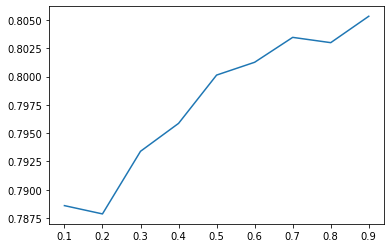

In [99]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [74]:
#finding the best hyper parameter using GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_samples": [0.5, 0.7, 0.9],
    "max_features": [0.5, 0.7, 0.9],
}
grid_search = GridSearchCV(bg, param_grid, scoring='accuracy',return_train_score=True, cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)

print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best parameter values {'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 100}
best estimator BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                     

In [75]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8094666666666667 {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
0.8114 {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
0.8118666666666666 {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 150}
0.8102 {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}
0.81 {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 100}
0.8114 {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 150}
0.8082 {'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 50}
0.8108666666666666 {'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 100}
0.8101333333333334 {'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 150}
0.8148 {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}
0.8168666666666666 {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100}
0.8172 {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 150}
0.8150666666666667 {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
0.8174666666666667 {'max_

In [76]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.8162

 precision 0.6545454545454545

 recall (sensitivity) 0.35804701627486435

 f1 0.4628872004675628


array([[11055,   627],
       [ 2130,  1188]], dtype=int64)

### Building the AdaBoost Classifier model:

In [37]:
#creating an object of AdaBoostClassifier tree model
ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
scores=cross_val_score(ab,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

acuracy on the 5 folds [0.79140287 0.79540153 0.80333333 0.81660554 0.79793264]
and their mean 0.8009351822520573


In [100]:
#making an array of mean score when learning_rate parameter changes from 0.1 to 1.0
l_score=[]
l_iteration=[]
for i in np.arange(0.1, 1, 0.1):
    ab=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),learning_rate=i)
    scores=cross_val_score(ab,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

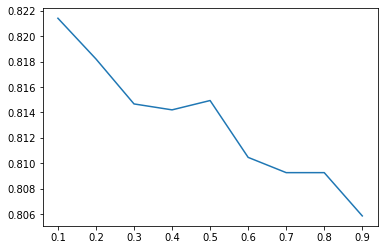

In [101]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [65]:
#finding the best hyper parameter using GridSearchCV
param_grid = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy',return_train_score=True, cv=5, n_jobs=-1)
grid_search.fit(train_X,train_Y)

print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best parameter values {'learning_rate': 0.01, 'n_estimators': 180}
best estimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                       

In [66]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8198 {'learning_rate': 0.01, 'n_estimators': 10}
0.8201333333333334 {'learning_rate': 0.01, 'n_estimators': 20}
0.8211333333333334 {'learning_rate': 0.01, 'n_estimators': 30}
0.8214 {'learning_rate': 0.01, 'n_estimators': 40}
0.8210666666666666 {'learning_rate': 0.01, 'n_estimators': 50}
0.8213333333333334 {'learning_rate': 0.01, 'n_estimators': 60}
0.8214666666666667 {'learning_rate': 0.01, 'n_estimators': 70}
0.8214 {'learning_rate': 0.01, 'n_estimators': 80}
0.8216 {'learning_rate': 0.01, 'n_estimators': 90}
0.822 {'learning_rate': 0.01, 'n_estimators': 100}
0.8222 {'learning_rate': 0.01, 'n_estimators': 110}
0.8224 {'learning_rate': 0.01, 'n_estimators': 120}
0.8223333333333334 {'learning_rate': 0.01, 'n_estimators': 130}
0.8222 {'learning_rate': 0.01, 'n_estimators': 140}
0.8224666666666667 {'learning_rate': 0.01, 'n_estimators': 150}
0.8222666666666667 {'learning_rate': 0.01, 'n_estimators': 160}
0.8220666666666666 {'learning_rate': 0.01, 'n_estimators': 170}
0.8226666666666667

In [67]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.8186

 precision 0.6876178504085481

 recall (sensitivity) 0.3297166968053044

 f1 0.445711957628845


array([[11185,   497],
       [ 2224,  1094]], dtype=int64)

### Building the SVM model:

In [39]:
#creating an object of SVM tree model
sv = SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(sv,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

acuracy on the 5 folds [0.77807398 0.77907364 0.77833333 0.78026009 0.77992664]
and their mean 0.7791335359407633


In [102]:
#making an array of mean score when C parameter changes from 0.1 to 1.0
l_score=[]
l_iteration=[]
for i in np.arange(0.1, 1, 0.1):
    sv = SVC(kernel='rbf',gamma='auto',C=i)
    scores=cross_val_score(sv,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

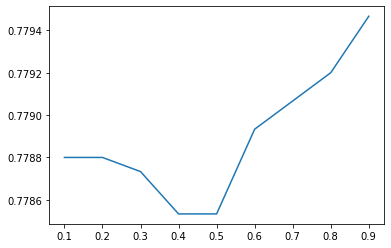

In [103]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [68]:
#finding the best hyper parameter using GridSearchCV
param_grid = [
     {'C': [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50], 'gamma':[0.01, 0.1, 0.5, 1]} ]

grid_search = GridSearchCV(sv, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X,train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

C:\Users\rishy\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best parameter values {'C': 0.5, 'gamma': 0.01}
best estimator SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [69]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7788 {'C': 0.01, 'gamma': 0.01}
0.7788 {'C': 0.01, 'gamma': 0.1}
0.7788 {'C': 0.01, 'gamma': 0.5}
0.7788 {'C': 0.01, 'gamma': 1}
0.7788 {'C': 0.1, 'gamma': 0.01}
0.7788 {'C': 0.1, 'gamma': 0.1}
0.7788 {'C': 0.1, 'gamma': 0.5}
0.7788 {'C': 0.1, 'gamma': 1}
0.7787333333333334 {'C': 0.2, 'gamma': 0.01}
0.7788 {'C': 0.2, 'gamma': 0.1}
0.7788 {'C': 0.2, 'gamma': 0.5}
0.7788 {'C': 0.2, 'gamma': 1}
0.7797333333333333 {'C': 0.5, 'gamma': 0.01}
0.7786 {'C': 0.5, 'gamma': 0.1}
0.7788 {'C': 0.5, 'gamma': 0.5}
0.7788 {'C': 0.5, 'gamma': 1}
0.7797333333333333 {'C': 0.8, 'gamma': 0.01}
0.7782666666666667 {'C': 0.8, 'gamma': 0.1}
0.7788666666666667 {'C': 0.8, 'gamma': 0.5}
0.7788666666666667 {'C': 0.8, 'gamma': 1}
0.7796666666666666 {'C': 1, 'gamma': 0.01}
0.7788 {'C': 1, 'gamma': 0.1}
0.7786666666666666 {'C': 1, 'gamma': 0.5}
0.7788666666666667 {'C': 1, 'gamma': 1}
0.7790666666666667 {'C': 5, 'gamma': 0.01}
0.7776666666666666 {'C': 5, 'gamma': 0.1}
0.7784666666666666 {'C': 5, 'gamma': 0.5}
0.77873

In [70]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.7789333333333334

 precision 0.5333333333333333

 recall (sensitivity) 0.004822182037371911

 f1 0.009557945041816009


array([[11668,    14],
       [ 3302,    16]], dtype=int64)

### Building the K means model:

In [46]:
#creating an object of K-mean model
km = KMeans(n_clusters=5, init="random", n_init=10,algorithm="full", max_iter=1, random_state=42)
scores=cross_val_score(km,train_X,train_Y, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.21266667 0.109      0.14733333 0.26233333 0.172     ]
and their mean 0.18066666666666667


In [104]:
#making an array of mean score when n_clusters parameter changes from 2 to 20
l_score=[]
l_iteration=[]
for i in range(2,20):
    km = KMeans(n_clusters=i, init="random", n_init=10,algorithm="full", max_iter=1, random_state=42)
    scores=cross_val_score(km,train_X,train_Y, scoring='accuracy', cv=5)
    l_iteration.append(i)
    l_score.append(np.mean(scores))

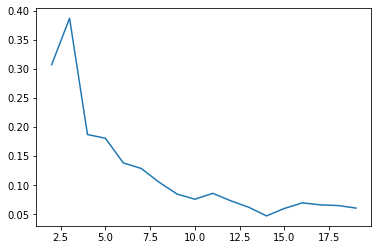

In [105]:
#ploting the graph of above array
plt.plot(l_iteration,l_score)
plt.show()

In [71]:
#finding the best hyper parameter using GridSearchCV
param_grid = {
    "n_clusters": [2, 3, 4, 5],
    "init": ["k-means++", "random"],
    "n_init": [10, 20, 30],
    "max_iter": [100, 200, 300],
}
grid_search = GridSearchCV(km, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(train_X,train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 20}
best estimator KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [72]:
#displaying the mean score (when there's any changes in the parameters) of each model
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6096 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10}
0.6906666666666667 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 20}
0.5356 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 30}
0.3960666666666667 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10}
0.4376 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 20}
0.33986666666666665 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 30}
0.2768 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 10}
0.23853333333333335 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 20}
0.20406666666666667 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 30}
0.26586666666666664 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5, 'n_init': 10}
0.3118666666666667 {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5, 'n_init': 20}
0.23353333333333334 {'init': 'k-means++', 'max_iter': 100, 'n_clu

In [73]:
#printing the accuracy, precision, recall and f1 score of our best best model
#also printing the confusion matrix
best_m=grid_search.best_estimator_
pred_Y=best_m.predict(test_X)

print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y))
print('\n recall (sensitivity)', recall_score(test_Y, pred_Y))
print('\n f1', f1_score(test_Y, pred_Y))

confusion_matrix(test_Y, pred_Y)


 accuracy 0.30866666666666664

 precision 0.22704753057748878

 recall (sensitivity) 0.8839662447257384

 f1 0.3612958856861296


array([[1697, 9985],
       [ 385, 2933]], dtype=int64)

## Here we have build k-Nearest Neighbours, Decision Trees, Random Forest, Bagging, AdaBoost, and SVM model. For each model first we have build the object of it (using the sklearn library), then using cross_val_score function we have build the array of mean score values (when we tweak one parameter of that model), after that we are ploting the graph of mean score values (which shows how the score varies over time). Then using GridSearchCV function we have found the best hyper parameters of that particular model, and printed the mean score with respect to each parameter tweak.

## In the end we have selected the best model (i.e the best hyper parameter combination) and printed the accuracy, precision, recall and f1 score of it. which is:

## For our best decision tree model the accuracy is 0.817
## For our best random forest classifier model the accuracy is 0.807
## For our best Bagging Classifier model the accuracy is 0.816
## For our best AdaBoost Classifier model the accuracy is 0.818
## For our best SVM model the accuracy is 0.778
## For our best K-mean model the accuracy is 0.308